## AE 484 | Midsem
### M Vishnu Sankar
#### 18B030013
#### 15/09

##### Rules to remember for every exam
###### Never Overthink
###### Every question is easy, atleast after Sir explains in class XD
###### Don't worry about time
###### One Question will definitely try to screw you up, try to break it into simpler problems // think from fundamentals to approach the problem

In [65]:
import numpy as np
import fem_1d_modular as fem
import matplotlib.pyplot as plt

In [42]:
np.exp(1)

2.718281828459045

In [43]:
def new_f(x):
    return(-1*(50*(2 - 5*x)*np.exp(-5*x)))

In [44]:
def new_u_exact(x):
    return((-10*x*np.exp(-5*x) + 10*x*np.exp(-5)))

## Q2

##### Q2 (a) 
the exact solution is 
$-10xe^{(-5x)} + 10xe^{(-5)}$

In [45]:
fem.f = new_f
fem.u_exact = new_u_exact

##### Q2 (B)

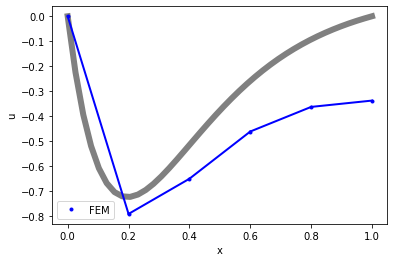

In [46]:
n_elt = 5
n_quad = 3

nodes, elements, dbc = fem.create_mesh_1d_uniform(n_elt)
uh = fem.solve_bvp(nodes, elements, dbc, n_quad)
fem.plot_fem_soln(nodes, elements, uh)

In [47]:
err_L2 = []
err_L2.append(fem.compute_L2_error(nodes, elements, uh))
print("L2 error is: ", err_L2[0])

L2 error is:  0.20776860795969065


##### Q2 (C)
$h(1-\lambda^N)/(1-\lambda) = 1$
From here we can calculate $h$ as:
$h = (1-\lambda)/(1-\lambda^N)$

In [48]:
def create_nonuniform_mesh_1d(n_elt, scale):
    h = (1-scale)/(1-scale**n_elt)
    N = n_elt - 1
    #nodes = np.linspace(0, 1, N+2)
    nodes = np.zeros(n_elt+1)

    for i in range(n_elt+1):
        if (i == 0):
            nodes[i] = 0.0
        else:
            nodes[i] = nodes[i-1] + h*scale**(i-1)
    
    elements = []
    for i in range(n_elt):
        elements.append([i, i+1])
    dbc = [[0, 0.0], [N+1, 0.0]]
    
    return nodes, elements, dbc

In [49]:
#un_nodes, nu_elements, nu_dbc = create_nonuniform_mesh_1d(5, 2)

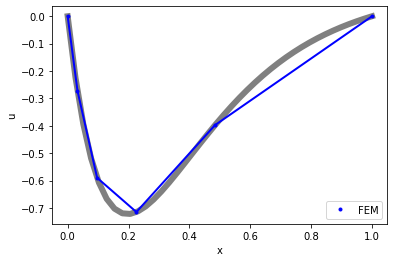

In [50]:
fem.create_mesh_1d_uniform = create_nonuniform_mesh_1d

n_elt = 5
n_quad = 3
scale = 2

nodes, elements, dbc = fem.create_mesh_1d_uniform(n_elt, scale)
uh = fem.solve_bvp(nodes, elements, dbc, n_quad)
fem.plot_fem_soln(nodes, elements, uh)
## Scale factor is 2

In [51]:
err_L2_scale2 = []
err_L2_scale2.append(fem.compute_L2_error(nodes, elements, uh))
print("L2 error is: ", err_L2_scale2[0])

L2 error is:  0.0394394535469181


### The L2 error associated with scale factor of 2 is ~0.03943945

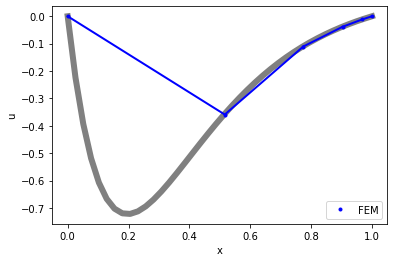

In [52]:
n_elt = 5
n_quad = 3
scale = 0.5

nodes, elements, dbc = fem.create_mesh_1d_uniform(n_elt, scale)
uh = fem.solve_bvp(nodes, elements, dbc, n_quad)
fem.plot_fem_soln(nodes, elements, uh)

In [53]:
err_L2_scale_half = []
err_L2_scale_half.append(fem.compute_L2_error(nodes, elements, uh))
print("L2 error is: ", err_L2_scale_half[0])

L2 error is:  0.29524038677791065


### The L2 error associated with scale factor of 2 is ~0.29524038 

##### The FEM solution with scale factor 2 has lower error than uniform mesh FEM solution. And the 
##### uniform mesh FEM sol has lower error than the one with scale factor = 0.5
##### This is expected since choosing a value of h>1 inserts more point on the left half of the domain thus giving better approximations. While choosing h<1, inserts lesser points on the left half of the domain and thus becaomes a slightly coarser mesh on the left half of the domain

## Q1 a and b

In [54]:
def LP_norm(p, N=1001, n_quad = 3):
    def f(xi): return((abs(np.sin(2*np.pi*xi)))**p)
    def diff_f(xi): return((abs(2*np.pi*np.cos(2*np.pi*xi)))**p)
    def f_g(xi): return( abs(0.1*np.sin(50*xi*np.pi))**p)
    def diff_f_g(xi): return( abs(50*np.pi*0.1*np.sin(50*xi*np.pi))**p)
    a = 0
    b = np.linspace(0, 1, N)
    int_LP = 0.0
    int_L2 = 0.0
    L_f_g = 0.0
    L_diff_f_g = 0.0
    for j in range(1, N):
        int_LP += fem.integrate_GL_quad(f, b[j-1], b[j], n_quad=n_quad)
        int_L2 += fem.integrate_GL_quad(diff_f, b[j-1], b[j], n_quad=n_quad)
        L_f_g += fem.integrate_GL_quad(f_g, b[j-1], b[j], n_quad=n_quad)
        L_diff_f_g += fem.integrate_GL_quad(diff_f_g, b[j-1], b[j], n_quad=n_quad)

    return(int_LP**(1/p), int_L2**(1/p), L_f_g**(1/p), L_diff_f_g**(1/p))


In [55]:
p = [1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 20000000]
norm = []
for i in p:
    norm.append(LP_norm(i)[0])

C:\Users\HP\AppData\Local\Temp\ipykernel_16764\3253187663.py:3: RuntimeWarning: overflow encountered in double_scalars
  def diff_f(xi): return((abs(2*np.pi*np.cos(2*np.pi*xi)))**p)
C:\Users\HP\AppData\Local\Temp\ipykernel_16764\3253187663.py:5: RuntimeWarning: overflow encountered in double_scalars
  def diff_f_g(xi): return( abs(50*np.pi*0.1*np.sin(50*xi*np.pi))**p)


In [56]:
print(norm)

[0.6366197723675817, 0.7071067811865476, 0.7515011011912179, 0.7825422900366437, 0.8057044646028292, 0.8691806681561713, 0.9168534676773322, 0.957206578383638, 0.9750088178857801, 0.9857219125095015, 0.9999994091595904]


### It can be observed that as the value of p increases the Lp norm approaches 1, this is expected since the the sup norm of sin(2*pi*x) in the interval [0,1] is indeed 1

## Q1 c

In [57]:
p_H1 = 2
L2_f, L2_diff_f, L2_f_g, L2_diff_f_g = LP_norm(p_H1)
H1_norm = (L2_f**2 + L2_diff_f**2)**0.5
print("H1 norm by code")
print(H1_norm)

H1 norm by code
4.49880081823798


In [58]:
print("Analytical H1 norm is")
print(((1/2) + (2*np.pi**2))**0.5)

Analytical H1 norm is
4.49880081823798


Hence both the analytical and hand calculation are matching

In [59]:
print("L2 Norm: ", L2_f_g)
print("H1 Norm: ", (L2_f_g**2 + L2_diff_f_g**2)**0.5)

L2 Norm:  0.07071067811865475
H1 Norm:  11.107432422194469


#### As can be seen from the above results, f and g are closer in L2 norm than in the H1

## Q3

In [66]:
def create_mesh_1d_uniform(n_elt):
    N = n_elt - 1
    nodes = np.linspace(0, 1, N+2)
    elements = []
    for i in range(n_elt):
        elements.append([i, i+1])
    dbc = [[0, 0.0]]
    return nodes, elements, dbc

In [67]:
fem.create_mesh_1d_uniform = create_mesh_1d_uniform

In [68]:
def banana_f(x, dum_F = 0.2):
    if (x<0.8):
        return(0.0)
    else:
        return(dum_F) # 10 is the force per unit length

In [69]:
fem.f = banana_f
n_elt = 100
n_quad = 3

nodes, elements, dbc = fem.create_mesh_1d_uniform(n_elt)
uh1 = fem.solve_bvp(nodes, elements, dbc, n_quad)

In [70]:
uh1[-1]

0.0

Text(0, 0.5, 'Total Momo force')

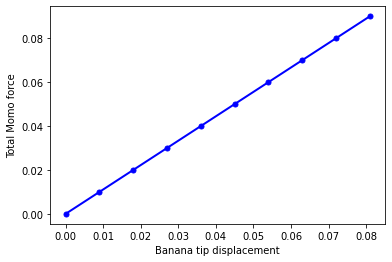

In [32]:
from scipy.sparse.linalg import spsolve

n_elt = 10
n_quad = 3

dF = 0.05
nF = 10

Fs = []
Us = []

nodes, elements, dbc = fem.create_mesh_1d_uniform(n_elt)
dbc = [[0, 0.0]] # DBC has to be modified to fix only the left end

dof = fem.create_dof(nodes, dbc)
fem.renumber_mesh_dof(nodes, elements, dof)

# Modify body force
def f(x, F):
    if x > 0.8:
        return F
    else:
        return 0.0
    
fem.f = f

# Since the stiffness matrix and part of the load vector due to body forces
# do not change during the computation, they can be precomputed.
K = fem.compute_stiffness_matrix(nodes, elements, n_quad)
K = K.tocsr()

N = fem._get_num_unknowns(dof)
U_dbc = dof[N:]
Kd = K[:N, N:] @ U_dbc

for i in range(nF):
    F = i*dF
    Fs.append(F*0.2)
    fem.f = lambda x: f(x, F)
    L = fem.compute_load_vector(nodes, elements, n_quad)
    uh = spsolve(K[:N, :N], L[:N] - Kd)
    Us.append(uh[-1])
    
plt.plot(Us, Fs, 'bo-', lw=2, markersize=5)
plt.xlabel('Banana tip displacement')
plt.ylabel('Total Momo force')